In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
link="https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv"
df=pd.read_csv(link)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
features=df.drop(['target',], axis=1)
target=df['target']

X=features.values
y=target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class SimpleBinaryClassifier(nn.Module):
    def __init__(self):
        super(SimpleBinaryClassifier, self).__init__()
        self.linear1 = nn.Linear(13, 1)
        # self.linear2 = nn.Linear(8,1)

    def forward(self, x):
        x = self.linear1(x)
        # x = self.linear2(x)
        return x

In [ ]:
train_losses = []
test_losses = []

In [ ]:
model = SimpleBinaryClassifier()

# Define the loss function and optimizer
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.009)
# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear previous gradients
    logits = model(X_train)  # Forward pass
    loss = loss_function(logits, y_train)  # Compute training loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    # Append the training loss for each epoch
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation during evaluation
        test_logits = model(X_test)  # Forward pass on test set
        test_loss = loss_function(test_logits, y_test)  # Compute test loss

    # Append the test loss for each epoch
    test_losses.append(test_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")



Epoch 1/500, Train Loss: 0.7164, Test Loss: 0.7084
Epoch 2/500, Train Loss: 0.7005, Test Loss: 0.6905
Epoch 3/500, Train Loss: 0.6851, Test Loss: 0.6733
Epoch 4/500, Train Loss: 0.6705, Test Loss: 0.6570
Epoch 5/500, Train Loss: 0.6564, Test Loss: 0.6414
Epoch 6/500, Train Loss: 0.6429, Test Loss: 0.6266
Epoch 7/500, Train Loss: 0.6301, Test Loss: 0.6126
Epoch 8/500, Train Loss: 0.6179, Test Loss: 0.5993
Epoch 9/500, Train Loss: 0.6062, Test Loss: 0.5867
Epoch 10/500, Train Loss: 0.5951, Test Loss: 0.5749
Epoch 11/500, Train Loss: 0.5845, Test Loss: 0.5637
Epoch 12/500, Train Loss: 0.5745, Test Loss: 0.5531
Epoch 13/500, Train Loss: 0.5649, Test Loss: 0.5431
Epoch 14/500, Train Loss: 0.5558, Test Loss: 0.5336
Epoch 15/500, Train Loss: 0.5471, Test Loss: 0.5247
Epoch 16/500, Train Loss: 0.5388, Test Loss: 0.5162
Epoch 17/500, Train Loss: 0.5309, Test Loss: 0.5082
Epoch 18/500, Train Loss: 0.5233, Test Loss: 0.5007
Epoch 19/500, Train Loss: 0.5162, Test Loss: 0.4935
Epoch 20/500, Train L

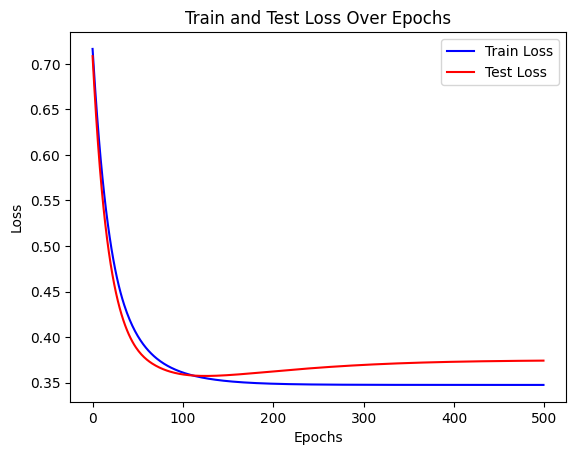

In [ ]:
# After training, plot the losses
plt.plot(train_losses, color='blue', label='Train Loss')
plt.plot(test_losses, color='red', label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')

plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    model.eval()
    test_logits = model(X_test)
    predictions = torch.sigmoid(test_logits) >= 0.5
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 83.61%


In [ ]:
print("Actual vs Predicted Targets:")
for actual, predicted in zip(y_test[:10], predicted_labels[:10]):  # Print first 10 results
    print(f"Actual: {actual.item()} - Predicted: {predicted.item()}")

Actual vs Predicted Targets:
Actual: 1.0 - Predicted: 1.0
Actual: 0.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
Actual: 0.0 - Predicted: 0.0
Actual: 1.0 - Predicted: 1.0
Actual: 1.0 - Predicted: 1.0
